In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [23]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

In [24]:
df = pd.DataFrame(X, columns=feature_names)
df["target"] = y

In [25]:
print("Dataset shape", df.shape)
print(df["target"].value_counts())

Dataset shape (569, 31)
target
1    357
0    212
Name: count, dtype: int64


In [26]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# Model 1 Baseline
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [29]:
# Making predictions
y_pred = baseline_model.predict(X_test)

In [30]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Model Accuracy: {accuracy*100:.2f} %")

Baseline Model Accuracy: 97.37 %


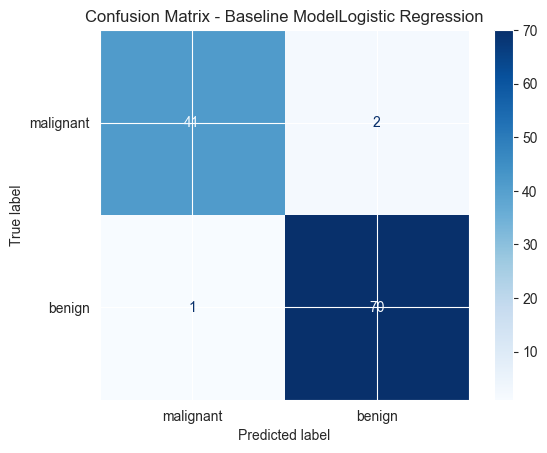

In [31]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Baseline ModelLogistic Regression")
plt.show()